In [104]:
import csv
import re
import pandas as pd
import numpy as np

In [105]:
###get the release season of each film
def getseason(path):
    df = pd.read_csv(path)
    season=[]
    for i in df['Release_date']:
        pattern = r'^\w+'                
        match= re.findall(pattern, i)
#         print(match)
        if match[0] == 'March' or match[0] =='April' or match[0] =='May':
            season.append('Spring')
        elif match[0] == 'June' or match[0] =='July' or match[0] =='August':
            season.append('Summer')
        elif match[0] == 'September' or match[0] =='October' or match[0] == 'November':
            season.append('Autumn')
        elif match[0] =='December' or match[0] =='January' or match[0] =='February':
            season.append('Winter')
        else:
            season.append(' ')
    df['Season']=season
    return df

In [106]:
path= 'Combine all 3(update).csv'
getseason(path)

,Unnamed: 0,Movie,Release_date,Language,Runtime,Budget,Revenue,Unnamed: 0_x,Name,Genre,Rating,Votes,BoxOffice,Year,Unnamed: 0_y,meter_score,audience_score,Season
0,0,the avengers,"May 4, 2012",English,2h 23m,"$220,000,000.00","$1,519,557,910.00",0.0,The Avengers,"Action, Adventure, Sci-Fi",8.1,1134273.0,"623,357,910",2012.0,0.0,NaN,NaN,Spring
1,1,snow white and the huntsman,"June 1, 2012",English,2h 7m,"$170,000,000.00","$396,600,000.00",16.0,Snow White and the Huntsman,"Action, Adventure, Drama",6.1,253972.0,"155,332,381",2012.0,16.0,48.0,52%,Summer
2,2,the hobbit: an unexpected journey,"December 14, 2012",English,2h 49m,"$250,000,000.00","$1,021,103,568.00",4.0,The Hobbit: An Unexpected Journey,"Adventure, Family, Fantasy",7.9,705872.0,"303,003,568",2012.0,4.0,92.0,86%,Winter
3,3,brave,"June 22, 2012",English,1h 33m,"$185,000,000.00","$538,983,207.00",7.0,Brave,"Animation, Adventure, Comedy",7.1,324942.0,"237,283,207",2012.0,7.0,92.0,86%,Summer
4,4,the dark knight rises,"July 20, 2012",English,2h 45m,"$250,000,000.00","$1,084,939,099.00",1.0,The Dark Knight Rises,"Action, Thriller",8.4,1343225.0,"448,139,099",2012.0,1.0,87.0,90%,Summer
5,5,django unchained,"December 11, 2012",English,2h 45m,"$100,000,000.00","$425,368,238.00",14.0,Django Unchained,"Drama, Western",8.4,1164954.0,"162,805,434",2012.0,14.0,NaN,83%,Winter
6,6,the amazing spider-man,"July 4, 2012",English,2h 16m,"$215,000,000.00","$752,215,857.00",6.0,The Amazing Spider-Man,"Action, Adventure, Sci-Fi",7.0,511325.0,"262,030,663",2012.0,6.0,92.0,86%,Summer
7,7,skyfall,"November 9, 2012",English,2h 23m,"$200,000,000.00","$1,108,561,013.00",3.0,Skyfall,"Action, Adventure, Thriller",7.8,580191.0,"304,360,277",2012.0,3.0,92.0,86%,Autumn
8,8,sexual chronicles of a french family,"June 1, 2012",French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2684.0,0.0,26%,Summer
9,9,the lorax,"March 1, 2012",English,1h 26m,"$70,000,000.00","$348,840,316.00",10.0,The Lorax,"Animation, Adventure, Comedy",6.4,87926.0,"214,030,500",2012.0,10.0,NaN,83%,Spring


In [107]:
###get the occurrence of each genre type
df = pd.read_csv('Combine all 3(update).csv')
genrelist= []
for i in df['Genre']:
    for s in (str(i)).split(","):
        s=s.strip()
        if s not in genrelist:
            genrelist.append(s)
# print(genrelist)
genre_occurences=[]
for g in genrelist:
    
    genre_occurences.append([g,df.Genre.str.count(g).sum()])
# print(genre_occurences)
##drop the 'nan'
genre_occurences = [x for x in genre_occurences if x[0] != 'nan']
def getw(item):
    return item[1]

genre_occurences =sorted(genre_occurences,key=getw,reverse=True)
genre_occurences[:5]

[['Drama', 956.0],
 ['Comedy', 565.0],
 ['Action', 359.0],
 ['Adventure', 293.0],
 ['Thriller', 286.0]]

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

               1
0               
Drama      956.0
Comedy     565.0
Action     359.0
Adventure  293.0
Thriller   286.0
Romance    255.0
Crime      243.0
Horror     189.0
Biography  175.0
Mystery    137.0
Fantasy    111.0
Sci-Fi     105.0
Animation   91.0
History     73.0
Music       66.0
Family      53.0
Sport       37.0
War         23.0
Western     12.0
Musical     10.0


<Figure size 46080x34560 with 0 Axes>

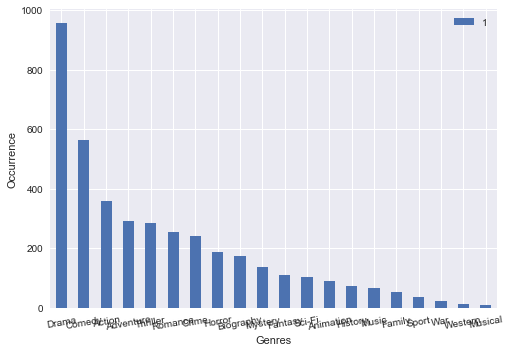

In [134]:
###plot film genre occurrence
df = pd.DataFrame(genre_occurences,)
df.set_index(0,inplace=True)
print(df)
plt.figure(figsize=(640,480))
df.plot.bar()
plt.xticks(rotation=10)
plt.xlabel("Genres")
plt.ylabel("Occurrence")
plt.show()